<a href="https://colab.research.google.com/github/coolmarkd/forza-dataviz/blob/main/Data_Vizualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check out [marktoso.com](https://marktoso.com) for futher information on this notebook under the 'data science' tag. 

In [14]:
from google.colab import drive
drive.mount('/content/drive')
# use this is you plan to pull files from your Google drive
# you can also use the file browser 
# it's over there
# <---------
# and you can upload files
# just remember to edit your file paths

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

# read csv file
amg_one = pd.read_csv('/content/drive/MyDrive/ForzaData/amg_one.csv')
z_car = pd.read_csv('/content/drive/MyDrive/ForzaData/240z_2.csv')
ford_falcon = pd.read_csv('/content/drive/MyDrive/ForzaData/ford_falcon.csv')
# display DataFrame
print(amg_one)

print(amg_one['CarClass'])
print(amg_one['CarPerformanceIndex'])
print(amg_one['DrivetrainType'])

      IsRaceOn  TimestampMS  ...  NormalDrivingLine  NormalAiBrakeDifference
0         True     86275968  ...                  0                        0
1         True     86301921  ...                 64                        0
2         True     86302046  ...                 64                        0
3         True     86302156  ...                 64                        0
4         True     86302250  ...                 64                        0
...        ...          ...  ...                ...                      ...
1641      True     86483562  ...                239                        0
1642      True     86483703  ...                239                        0
1643      True     86483796  ...                239                        0
1644      True     86483906  ...                239                        0
1645      True     86484000  ...                238                        0

[1646 rows x 85 columns]
0       6
1       6
2       6
3       6
4       6


This loads up the files into pandas `DataFrame` objects and we can print them out or otherwise examine them. 

In [16]:
for col in amg_one.columns:
    print(col)
# see the colums in a DataFrame. Helpful

IsRaceOn
TimestampMS
EngineMaxRpm
EngineIdleRpm
CurrentEngineRpm
AccelerationX
AccelerationY
AccelerationZ
VelocityX
VelocityY
VelocityZ
AngularVelocityX
AngularVelocityY
AngularVelocityZ
Yaw
Pitch
Roll
NormalizedSuspensionTravelFrontLeft
NormalizedSuspensionTravelFrontRight
NormalizedSuspensionTravelRearLeft
NormalizedSuspensionTravelRearRight
TireSlipRatioFrontLeft
TireSlipRatioFrontRight
TireSlipRatioRearLeft
TireSlipRatioRearRight
WheelRotationSpeedFrontLeft
WheelRotationSpeedFrontRight
WheelRotationSpeedRearLeft
WheelRotationSpeedRearRight
WheelOnRumbleStripFrontLeft
WheelOnRumbleStripFrontRight
WheelOnRumbleStripRearLeft
WheelOnRumbleStripRearRight
WheelInPuddleDepthFrontLeft
WheelInPuddleDepthFrontRight
WheelInPuddleDepthRearLeft
WheelInPuddleDepthRearRight
SurfaceRumbleFrontLeft
SurfaceRumbleFrontRight
SurfaceRumbleRearLeft
SurfaceRumbleRearRight
TireSlipAngleFrontLeft
TireSlipAngleFrontRight
TireSlipAngleRearLeft
TireSlipAngleRearRight
TireCombinedSlipFrontLeft
TireCombinedSli

In [17]:
race_amg_one = amg_one.loc[(amg_one['IsRaceOn'] == 1)]
race_240z = z_car.loc[(z_car['IsRaceOn'] == 1)]
race_falcon = ford_falcon.loc[(ford_falcon['IsRaceOn'] == 1)]

created some `race` objects to only gather the frames from the `DataFrame` where `IsRaceOn = 1`. 

By nature of the telemtry it's always sending data and that may not always be helpful or useful. 

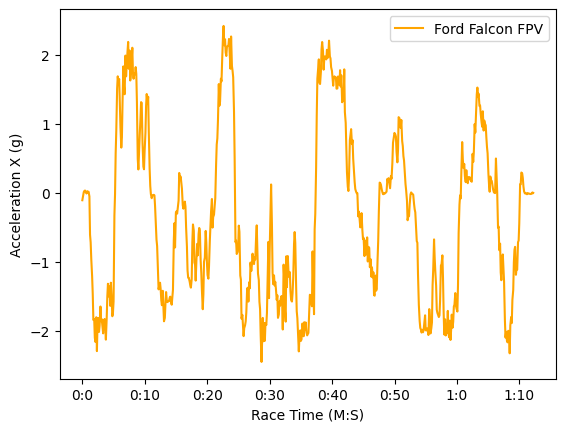

In [18]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as tick
WELCOME_TO_EARTH = 9.80665
# read csv file
ford_falcon = pd.read_csv('/content/drive/MyDrive/ForzaData/ford_falcon_video.csv')
race_falcon = ford_falcon.loc[(ford_falcon['IsRaceOn'] == 1)]
lap = race_falcon.loc[(race_falcon['Lap'] == 2)]
plt.style.use('default')
fig, ax = plt.subplots()

ax.plot(lap['CurrentLapTime'],lap['AccelerationX'] / WELCOME_TO_EARTH, color="orange", label="Ford Falcon FPV")
ax.set_xlabel("Race Time (M:S)")
ax.set_ylabel("Acceleration X (g)")

def racetime_fmt(x, y):
    minutes, seconds = divmod(x, 60)
    return "{:.0f}".format(minutes) + ':' + "{:.0f}".format(seconds)

ax.xaxis.set_major_formatter(tick.FuncFormatter(racetime_fmt))
ax.legend()

Cool graph but can you stack on another graph and annotate it?

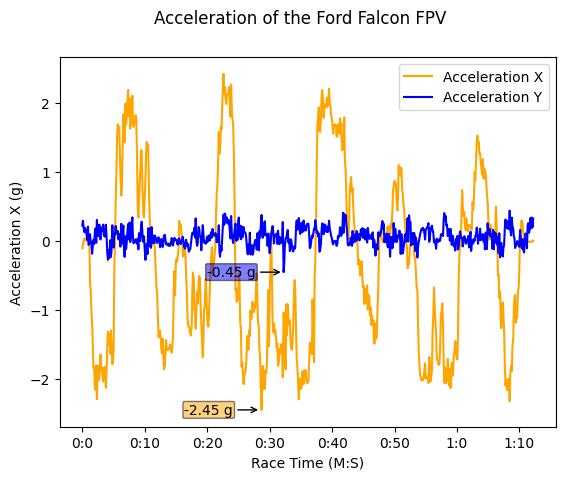

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as tick
import numpy as np

WELCOME_TO_EARTH = 9.80665
# read csv file
ford_falcon = pd.read_csv('/content/drive/MyDrive/ForzaData/ford_falcon_video.csv')
race_falcon = ford_falcon.loc[(ford_falcon['IsRaceOn'] == 1)]
lap = race_falcon.loc[(race_falcon['Lap'] == 2)]
plt.style.use('default')
fig, ax = plt.subplots()
## first figure
#ax.set_title("Acceleration along the X axis")
ax.plot(lap['CurrentLapTime'],lap['AccelerationX'] / WELCOME_TO_EARTH, color="orange", label="Acceleration X")
ax.plot(lap['CurrentLapTime'],lap['AccelerationY'] / WELCOME_TO_EARTH, color="blue", label="Acceleration Y")
ax.set_xlabel("Race Time (M:S)")
ax.set_ylabel("Acceleration X (g)")


time_max_g_x = lap.loc[(abs(lap['AccelerationX']) == abs(lap['AccelerationX']).max())]
#print(time_max_g_x)
x_note_x = time_max_g_x['CurrentLapTime']
#print(x_note_x)
x_note_y = time_max_g_x['AccelerationX'].mean() / WELCOME_TO_EARTH #i don't know why this doesnt' convert to a value on its own
#print(x_note_y)

time_max_g_y = lap.loc[(abs(lap['AccelerationY']) == abs(lap['AccelerationY']).max())]
y_note_x = time_max_g_y['CurrentLapTime']
y_note_y = time_max_g_y['AccelerationY'].mean() / WELCOME_TO_EARTH

## annotation for max G X
ax.annotate("{:.2f} g".format(x_note_y),
            xy=(x_note_x - .1, x_note_y), xycoords='data',
            xytext=(-20, -5), textcoords='offset points',
            bbox = dict(boxstyle = 'round,pad=0.1', fc = 'orange', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),
            horizontalalignment='right', verticalalignment='bottom')

## annotation for max G Y
ax.annotate("{:.2f} g".format(y_note_y),
            xy=(y_note_x, y_note_y), xycoords='data',
            xytext=(-20, -5), textcoords='offset points',
            bbox = dict(boxstyle = 'round,pad=0.1', fc = 'blue', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),
            horizontalalignment='right', verticalalignment='bottom')

def racetime_fmt(x, y):
    minutes, seconds = divmod(x, 60)
    return "{:.0f}".format(minutes) + ':' + "{:.0f}".format(seconds)

ax.xaxis.set_major_formatter(tick.FuncFormatter(racetime_fmt))
ax.legend()

fig.subplots_adjust(hspace=0.75)
fig.suptitle("Acceleration of the Ford Falcon FPV")
fig.show()

What if there were more cars? What then? Here's what that could look like (and yes I did crash in the 240Z). 

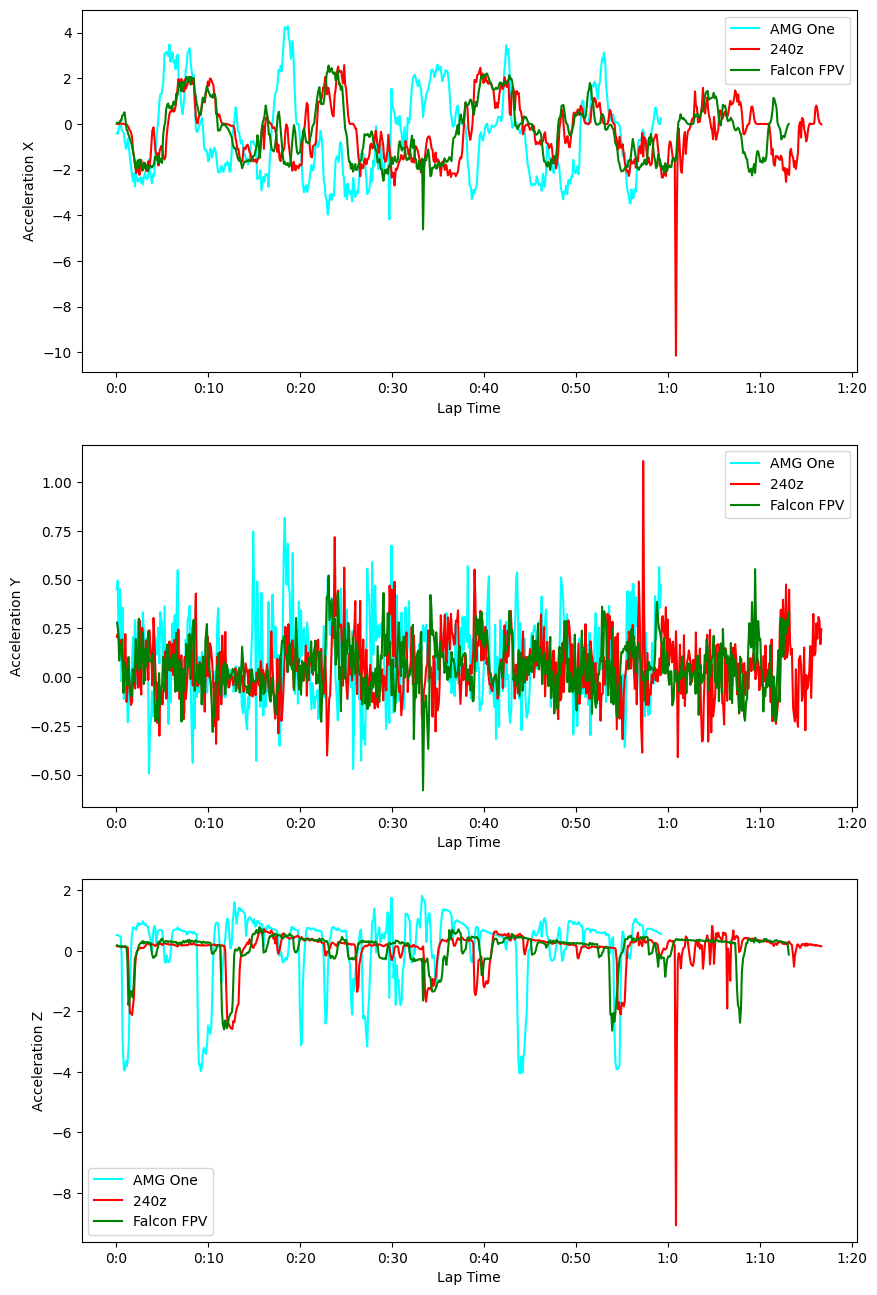

In [20]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as tick
import numpy as np

WELCOME_TO_EARTH = 9.80665

# read csv file
amg_one = pd.read_csv('/content/drive/MyDrive/ForzaData/amg_one.csv')
z_car = pd.read_csv('/content/drive/MyDrive/ForzaData/240z_3.csv')
ford_falcon = pd.read_csv('/content/drive/MyDrive/ForzaData/ford_falcon.csv')

race_amg_one = amg_one.loc[(amg_one['IsRaceOn'] == 1)]
race_240z = z_car.loc[(z_car['IsRaceOn'] == 1)]
race_falcon = ford_falcon.loc[(ford_falcon['IsRaceOn'] == 1)]

fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_figheight(16)
fig.set_figwidth(10)

lap_amg = race_amg_one.loc[(race_amg_one['Lap'] == 2)]
lap_240z = race_240z.loc[(race_240z['Lap'] == 2)]
lap_falcon = race_falcon.loc[(race_falcon['Lap'] == 2)]


ax1.plot(lap_amg['CurrentLapTime'],lap_amg['AccelerationX'] / WELCOME_TO_EARTH, color='cyan',label="AMG One")
ax1.plot(lap_240z['CurrentLapTime'],lap_240z['AccelerationX'] / WELCOME_TO_EARTH, color='red',label="240z")
ax1.plot(lap_falcon['CurrentLapTime'],lap_falcon['AccelerationX'] / WELCOME_TO_EARTH, color='green', label="Falcon FPV")  
ax1.set_xlabel("Lap Time")
ax1.set_ylabel("Acceleration X")
ax1.legend()

ax2.plot(lap_amg['CurrentLapTime'],lap_amg['AccelerationY'] / WELCOME_TO_EARTH, color='cyan',label="AMG One")
ax2.plot(lap_240z['CurrentLapTime'],lap_240z['AccelerationY'] / WELCOME_TO_EARTH, color='red',label="240z")
ax2.plot(lap_falcon['CurrentLapTime'],lap_falcon['AccelerationY'] / WELCOME_TO_EARTH, color='green', label="Falcon FPV")
ax2.set_xlabel("Lap Time")
ax2.set_ylabel("Acceleration Y")
ax2.legend()

ax3.plot(lap_amg['CurrentLapTime'],lap_amg['AccelerationZ'] / WELCOME_TO_EARTH, color='cyan',label="AMG One")
ax3.plot(lap_240z['CurrentLapTime'],lap_240z['AccelerationZ'] / WELCOME_TO_EARTH, color='red',label="240z")
ax3.plot(lap_falcon['CurrentLapTime'],lap_falcon['AccelerationZ'] / WELCOME_TO_EARTH, color='green', label="Falcon FPV")
ax3.set_xlabel("Lap Time")
ax3.set_ylabel("Acceleration Z")
ax3.legend()

def racetime_fmt(x, y):
    minutes, seconds = divmod(x, 60)
    return "{:.0f}".format(minutes) + ':' + "{:.0f}".format(seconds)

ax1.xaxis.set_major_formatter(tick.FuncFormatter(racetime_fmt))
ax2.xaxis.set_major_formatter(tick.FuncFormatter(racetime_fmt))
ax3.xaxis.set_major_formatter(tick.FuncFormatter(racetime_fmt))
ax.legend()



What other ways can we plot acceleration? A histogram can help us understand the magnitude and the frequency as well as comparing it to another car. You'll see that, with the axes being equal, the Falcon's magnitude is much smaller but that some trends still hold true like the line in the middle (straight line braking and acceleration [there is no braking in physics it's just negative acceleration or, more precisely, acceleration in a different direction]) as well as the "wings" as I like to call them on the left and right. Those would, obviously, be turns, and they extend forward and backwards because there is both braking and acceleration into turns. 

The brighter the dot is the more frequent there were values in this range, or "bin" as they are called in a histogram. 

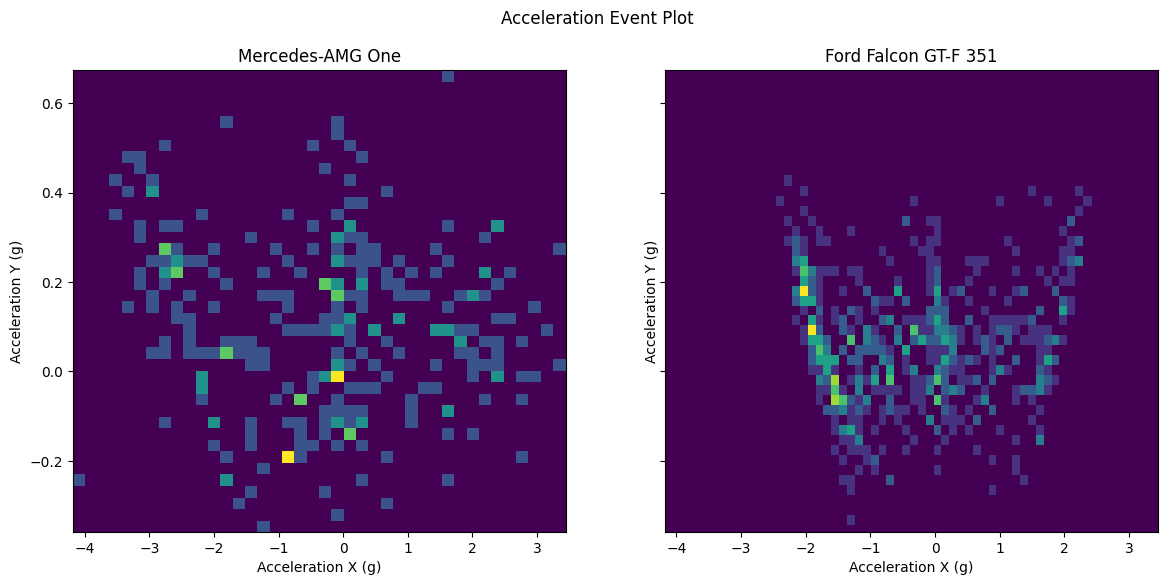

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as tick
import numpy as np


WELCOME_TO_EARTH = 9.80665
# read csv file
ford_falcon = pd.read_csv('/content/drive/MyDrive/ForzaData/ford_falcon_video.csv')
race_falcon = ford_falcon.loc[(ford_falcon['IsRaceOn'] == 1)]
lap = race_falcon.loc[(race_falcon['Lap'] == 2)]

race_amg_one = amg_one.loc[(ford_falcon['IsRaceOn'] == 1)]
lap_amg = race_amg_one.loc[(race_falcon['Lap'] == 2)]

plt.style.use('default')


fig, (ax, ax2) = plt.subplots(1,2,tight_layout=False, sharex=True,sharey=True)
fig.set_size_inches(14,6, forward=True)


hist = ax2.hist2d(lap['AccelerationX'] / WELCOME_TO_EARTH, lap['AccelerationY'] / WELCOME_TO_EARTH, bins=40)
ax2.set_facecolor('#440154') #the histogram would have white borders since we scaled up the axes to match the AMG

hist2 = ax.hist2d(lap_amg['AccelerationX'] / WELCOME_TO_EARTH, lap_amg['AccelerationY'] / WELCOME_TO_EARTH, bins=40)

ax.set_title("Mercedes-AMG One")
ax.set_xlabel("Acceleration X (g)")
ax.set_ylabel("Acceleration Y (g)")
ax2.set_title("Ford Falcon GT-F 351")
ax2.set_xlabel("Acceleration X (g)")
ax2.set_ylabel("Acceleration Y (g)")


def racetime_fmt(x, y):
    minutes, seconds = divmod(x, 60)
    return "{:.0f}".format(minutes) + ':' + "{:.0f}".format(seconds)

fig.suptitle("Acceleration Event Plot")
fig.show()

We can also do a scatter plot which uses dots to show where the datapoints are but that we can color code based on magnitude. There's also a nifty colorbar down there where the average for the Falcon and the AMG have been added as ticks. Yes, the AMG is the larger of the two. I'm fairly certain that 4.9 is me tapping a wall in the telemetry but I dont' have video of that race and I haven't had a chance to grab more. 

In [22]:
dir(plt.cm)

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'LUTSIZE',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'ScalarMappable',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_gen_cmap_d',
 '_reverser',
 'a

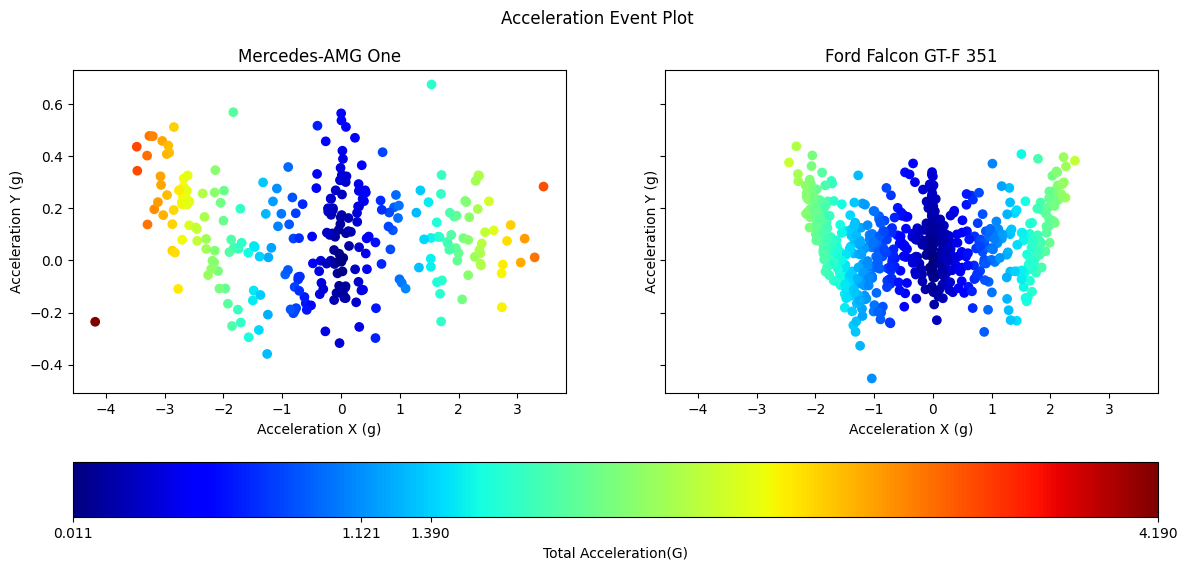

In [23]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as tick
import numpy as np
import matplotlib as mpl # new import


WELCOME_TO_EARTH = 9.80665
# read csv file
ford_falcon = pd.read_csv('/content/drive/MyDrive/ForzaData/ford_falcon_video.csv')
race_falcon = ford_falcon.loc[(ford_falcon['IsRaceOn'] == 1)]
lap = race_falcon.loc[(race_falcon['Lap'] == 2)]

race_amg_one = amg_one.loc[(ford_falcon['IsRaceOn'] == 1)]
lap_amg = race_amg_one.loc[(race_falcon['Lap'] == 2)]

## Add total acceleration to dataframe
#lap['TotalAcceleration'] = np.sqrt(pow(lap['AccelerationX'],2) + pow(lap['AccelerationY'],2) + pow(lap['AccelerationZ'],2))/ 9.81
#lap = lap.loc[(lap['TotalAcceleration']!=lap['TotalAcceleration'].max())]
lap = lap.assign(TotalAcceleration=lambda x: np.sqrt(pow(x['AccelerationX'],2) + pow(x['AccelerationY'],2))/ WELCOME_TO_EARTH)
lap_amg = lap_amg.assign(TotalAcceleration=lambda x: np.sqrt(pow(x['AccelerationX'],2) + pow(x['AccelerationY'],2))/ WELCOME_TO_EARTH)
plt.style.use('default')

#fig, ax = plt.subplots()
## first figure
#ax.set_title("Acceleration along the X axis")
#atplotlib.pyplot.hist2d(lap['AccelerationX'], lap['AccelerationY'], bins=10, range=None, density=False, weights=None, cmin=None, cmax=None, *, data=None, **kwargs)

fig, (ax, ax2) = plt.subplots(1,2,tight_layout=False, sharex=True,sharey=True)
fig.set_size_inches(14,6, forward=True)
#ax.axis('equal')
cmap = plt.cm.jet
norm = plt.Normalize(vmin=np.min(abs(lap['TotalAcceleration'])), vmax=np.max(abs(lap_amg['TotalAcceleration'])))
scatter = ax2.scatter(lap['AccelerationX'] / WELCOME_TO_EARTH, lap['AccelerationY'] / WELCOME_TO_EARTH, color=cmap(norm(abs(lap['TotalAcceleration'])) ))
#ax2.set_facecolor('#440154')

scatter_amg = ax.scatter(lap_amg['AccelerationX'] / WELCOME_TO_EARTH, lap_amg['AccelerationY'] / WELCOME_TO_EARTH, color=cmap(norm(abs(lap_amg['TotalAcceleration']))))
#ax.plot(lap['CurrentLapTime'],lap['TotalAcceleration'], color="orange", label="Acceleration X + Y")
ax.set_title("Mercedes-AMG One")
ax.set_xlabel("Acceleration X (g)")
ax.set_ylabel("Acceleration Y (g)")
ax2.set_title("Ford Falcon GT-F 351")
ax2.set_xlabel("Acceleration X (g)")
ax2.set_ylabel("Acceleration Y (g)")

#axcb = fig.add_axes()


sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=[ax, ax2],ticks=[np.min(lap['TotalAcceleration']),np.mean(lap['TotalAcceleration']),np.mean(lap_amg['TotalAcceleration']),np.max(lap_amg['TotalAcceleration'])],label="Total Acceleration(G)",orientation="horizontal")
def racetime_fmt(x, y):
    minutes, seconds = divmod(x, 60)
    return "{:.0f}".format(minutes) + ':' + "{:.0f}".format(seconds)


fig.suptitle("Acceleration Event Plot")
fig.show()

Let's see how difficult it might be to add a tick at every standard deviation just to give some scale.

In [24]:
np.std(lap['TotalAcceleration'])

totalaccel_falcon = lap['TotalAcceleration'].to_numpy()
totalaccel_amg = lap_amg['TotalAcceleration'].to_numpy()


total_totals = np.append(totalaccel_amg, totalaccel_falcon)

std_dev = np.std(total_totals)
std_rounded = round(np.std(total_totals),3)
print (std_rounded) #debugging



mintick = np.min(lap['TotalAcceleration'])
maxtick = np.max(lap_amg['TotalAcceleration'])
ticks = [mintick, maxtick, np.mean(lap['TotalAcceleration']), np.mean(lap_amg['TotalAcceleration'])]
i = mintick
while i < maxtick - std_dev:
  i = i + std_dev
  ticks.append(round(i, 3))


0.798


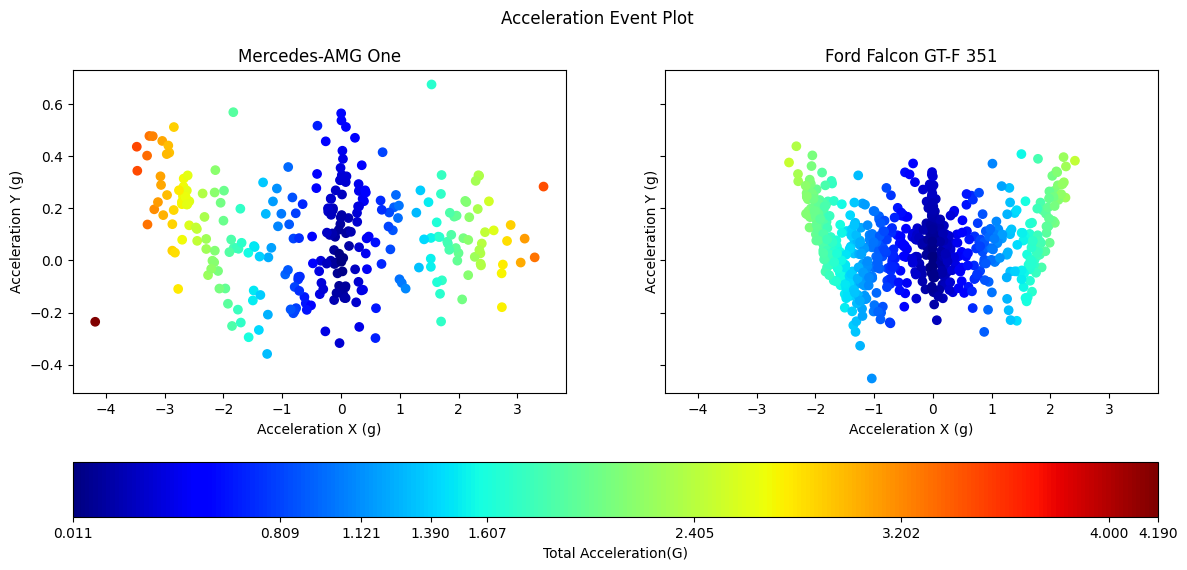

In [25]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as tick
import numpy as np
import matplotlib as mpl # new import


WELCOME_TO_EARTH = 9.80665
# read csv file
ford_falcon = pd.read_csv('/content/drive/MyDrive/ForzaData/ford_falcon_video.csv')
race_falcon = ford_falcon.loc[(ford_falcon['IsRaceOn'] == 1)]
lap = race_falcon.loc[(race_falcon['Lap'] == 2)]

race_amg_one = amg_one.loc[(ford_falcon['IsRaceOn'] == 1)]
lap_amg = race_amg_one.loc[(race_falcon['Lap'] == 2)]

## Add total acceleration to dataframe
#lap['TotalAcceleration'] = np.sqrt(pow(lap['AccelerationX'],2) + pow(lap['AccelerationY'],2) + pow(lap['AccelerationZ'],2))/ 9.81
#lap = lap.loc[(lap['TotalAcceleration']!=lap['TotalAcceleration'].max())]
lap = lap.assign(TotalAcceleration=lambda x: np.sqrt(pow(x['AccelerationX'],2) + pow(x['AccelerationY'],2))/ WELCOME_TO_EARTH)
lap_amg = lap_amg.assign(TotalAcceleration=lambda x: np.sqrt(pow(x['AccelerationX'],2) + pow(x['AccelerationY'],2))/ WELCOME_TO_EARTH)
plt.style.use('default')

#fig, ax = plt.subplots()
## first figure
#ax.set_title("Acceleration along the X axis")
#atplotlib.pyplot.hist2d(lap['AccelerationX'], lap['AccelerationY'], bins=10, range=None, density=False, weights=None, cmin=None, cmax=None, *, data=None, **kwargs)

fig, (ax, ax2) = plt.subplots(1,2,tight_layout=False, sharex=True,sharey=True)
fig.set_size_inches(14,6, forward=True)
#ax.axis('equal')
cmap = plt.cm.jet
norm = plt.Normalize(vmin=np.min(abs(lap['TotalAcceleration'])), vmax=np.max(abs(lap_amg['TotalAcceleration'])))
scatter = ax2.scatter(lap['AccelerationX'] / WELCOME_TO_EARTH, lap['AccelerationY'] / WELCOME_TO_EARTH, color=cmap(norm(abs(lap['TotalAcceleration'])) ))
#ax2.set_facecolor('#440154')

scatter_amg = ax.scatter(lap_amg['AccelerationX'] / WELCOME_TO_EARTH, lap_amg['AccelerationY'] / WELCOME_TO_EARTH, color=cmap(norm(abs(lap_amg['TotalAcceleration']))))
#ax.plot(lap['CurrentLapTime'],lap['TotalAcceleration'], color="orange", label="Acceleration X + Y")
ax.set_title("Mercedes-AMG One")
ax.set_xlabel("Acceleration X (g)")
ax.set_ylabel("Acceleration Y (g)")
ax2.set_title("Ford Falcon GT-F 351")
ax2.set_xlabel("Acceleration X (g)")
ax2.set_ylabel("Acceleration Y (g)")

#axcb = fig.add_axes()


sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
#plt.colorbar(sm, ax=[ax, ax2],ticks=[np.min(lap['TotalAcceleration']),np.mean(lap['TotalAcceleration']),np.mean(lap_amg['TotalAcceleration']),np.max(lap_amg['TotalAcceleration'])],label="Total Acceleration(G)",orientation="horizontal")
plt.colorbar(sm, ax=[ax, ax2],ticks=ticks,label="Total Acceleration(G)",orientation="horizontal")
def racetime_fmt(x, y):
    minutes, seconds = divmod(x, 60)
    return "{:.0f}".format(minutes) + ':' + "{:.0f}".format(seconds)


fig.suptitle("Acceleration Event Plot")
fig.show()

It gets a little confusing with the averages there in the colorbar. They're not identified which isn't the end of the world but which also isn't helpful for someone who is looking at this cold. Can we annotate it? Maybe. Or maybe we can figure something out. 

0.798
1.2011456653847086


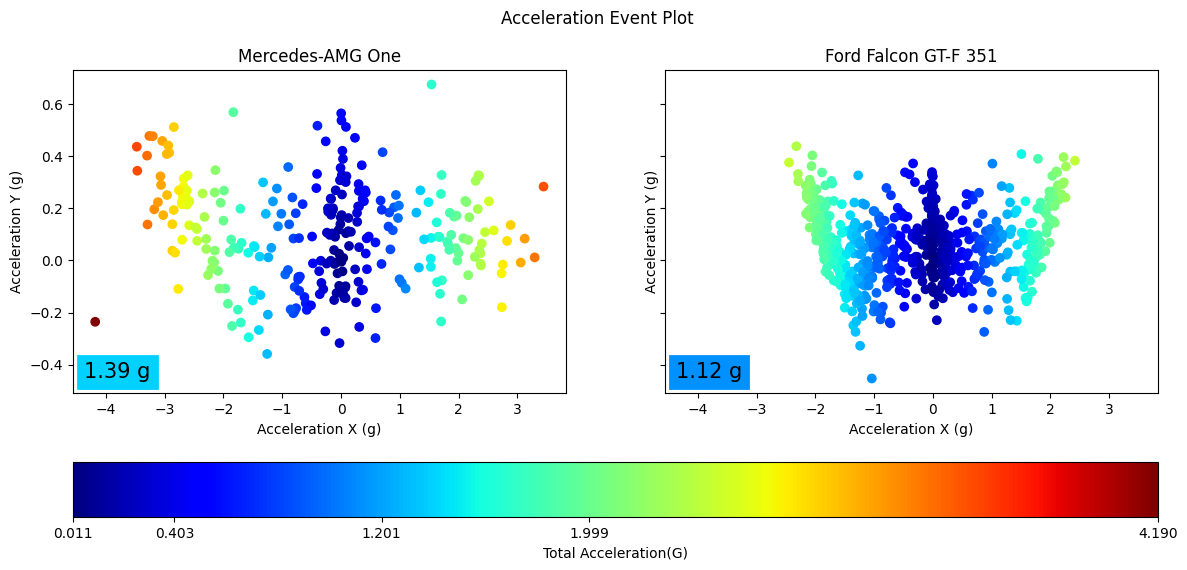

In [26]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as tick
import numpy as np
import matplotlib as mpl # new import


WELCOME_TO_EARTH = 9.80665
# read csv file
ford_falcon = pd.read_csv('/content/drive/MyDrive/ForzaData/ford_falcon_video.csv')
race_falcon = ford_falcon.loc[(ford_falcon['IsRaceOn'] == 1)]
lap = race_falcon.loc[(race_falcon['Lap'] == 2)]

race_amg_one = amg_one.loc[(ford_falcon['IsRaceOn'] == 1)]
lap_amg = race_amg_one.loc[(race_falcon['Lap'] == 2)]

## Add total acceleration to dataframe
lap = lap.assign(TotalAcceleration=lambda x: np.sqrt(pow(x['AccelerationX'],2) + pow(x['AccelerationY'],2))/ WELCOME_TO_EARTH)
lap_amg = lap_amg.assign(TotalAcceleration=lambda x: np.sqrt(pow(x['AccelerationX'],2) + pow(x['AccelerationY'],2))/ WELCOME_TO_EARTH)
plt.style.use('default')


fig, (ax, ax2) = plt.subplots(1,2,tight_layout=False, sharex=True,sharey=True)
fig.set_size_inches(14,6, forward=True)
cmap = plt.cm.jet
norm = plt.Normalize(vmin=np.min(abs(lap['TotalAcceleration'])), vmax=np.max(abs(lap_amg['TotalAcceleration'])))
scatter = ax2.scatter(lap['AccelerationX'] / WELCOME_TO_EARTH, lap['AccelerationY'] / WELCOME_TO_EARTH, color=cmap(norm(abs(lap['TotalAcceleration'])) ))

scatter_amg = ax.scatter(lap_amg['AccelerationX'] / WELCOME_TO_EARTH, lap_amg['AccelerationY'] / WELCOME_TO_EARTH, color=cmap(norm(abs(lap_amg['TotalAcceleration']))))
ax.set_title("Mercedes-AMG One")
ax.set_xlabel("Acceleration X (g)")
ax.set_ylabel("Acceleration Y (g)")
ax2.set_title("Ford Falcon GT-F 351")
ax2.set_xlabel("Acceleration X (g)")
ax2.set_ylabel("Acceleration Y (g)")

# colorbar setup
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# colorbar ticks setup
np.std(lap['TotalAcceleration'])

totalaccel_falcon = lap['TotalAcceleration'].to_numpy()
totalaccel_amg = lap_amg['TotalAcceleration'].to_numpy()
total_totals = np.append(totalaccel_amg, totalaccel_falcon)
std_dev = np.std(total_totals)
std_rounded = round(np.std(total_totals),3)
print (std_rounded) #debugging
mintick = np.min(lap['TotalAcceleration'])
maxtick = np.max(lap_amg['TotalAcceleration'])
ticks = [mintick, maxtick, np.mean(total_totals)]
mean_std = np.mean(total_totals)
print (mean_std)
ticks.append(round(mean_std - std_dev, 3))
ticks.append(round(mean_std + std_dev, 3))
#i = mintick
#while i < maxtick - std_dev:
  #i = i + std_dev
  #ticks.append(round(i, 3))

# then the colorbar
plt.colorbar(sm, ax=[ax, ax2],ticks=ticks,label="Total Acceleration(G)",orientation="horizontal")
def racetime_fmt(x, y):
    minutes, seconds = divmod(x, 60)
    return "{:.0f}".format(minutes) + ':' + "{:.0f}".format(seconds)
xlimmleft, xlimright = ax.axes.get_xlim()
ylimbottom, ylimtop = ax.axes.get_ylim()
amg_txt = ax.text( s ="{:.2f} g".format(np.mean(lap_amg['TotalAcceleration'])), x=.09, y=.065, transform=ax.transAxes, 
                  ha="center", va="center", rotation=0, size=15, 
                  bbox=dict(boxstyle="square,pad=0.3", fc=cmap(norm(np.mean(lap_amg['TotalAcceleration']))),
                            ec=cmap(norm(np.mean(lap_amg['TotalAcceleration']))), lw=2))

falcon_txt = ax2.text( s ="{:.2f} g".format(np.mean(lap['TotalAcceleration'])), x=.09, y=.065, transform=ax2.transAxes, 
                  ha="center", va="center", rotation=0, size=15, 
                  bbox=dict(boxstyle="square,pad=0.3", fc=cmap(norm(np.mean(lap['TotalAcceleration']))),
                            ec=cmap(norm(np.mean(lap['TotalAcceleration']))), lw=2))


fig.suptitle("Acceleration Event Plot")
fig.show()

So we annotated the mean for each car as well as what color it would be based on the color map. We also included the standard deviation assuming a normal distribution in the colorbar. I don't know that it's completely accurate to say that but it is what a lot of people bring to bear on various values and this is just one of those ways where statistics is lies. There are three kinds of lies:
1. lies
2. damned lies
3. statistics

I think this is attributed to Mark Twain.

But based on this we can see that very few accelerations readings, comparatively, are above 1.99 g. That's just an interesting thing to show.

Ready for a 3D Plot y'all? I am.

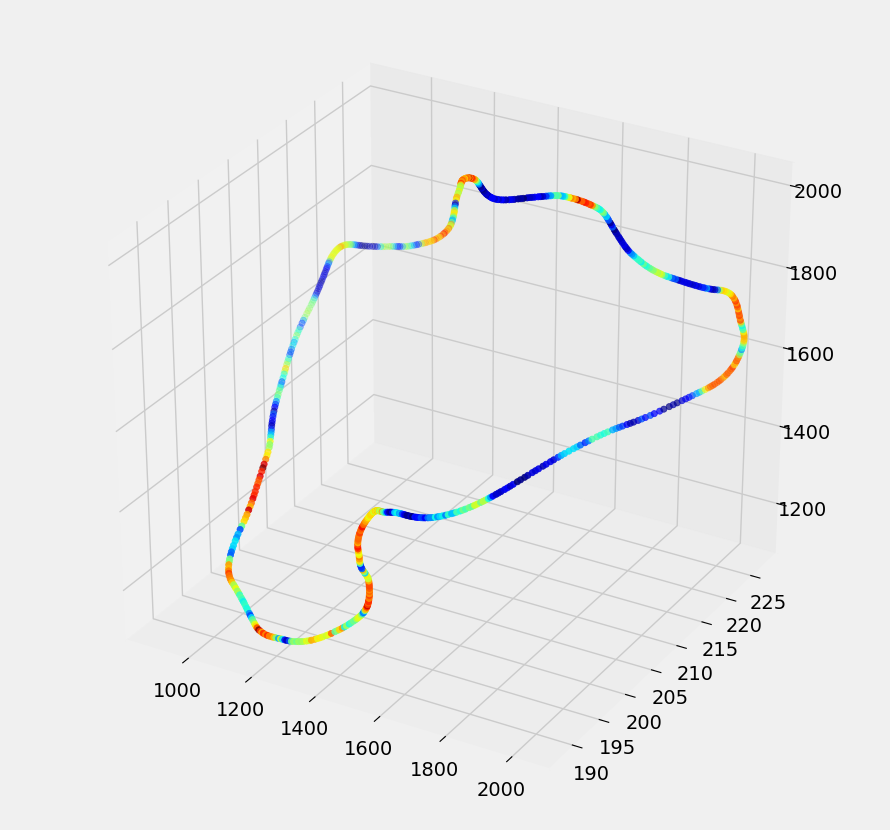

In [27]:
from mpl_toolkits import mplot3d
import matplotlib as mpl
import numpy as np
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
#cb1=mpl.colorbar.ColorbarBase(ax,cmap=cmap,norm=norm,orientation='horizontal')
#second lap is probably a little less odd than the first
#lap = race_amg_one.loc[(amg_one['Lap'] == 2)]
cmap = plt.cm.jet
norm = plt.Normalize(vmin=np.min(abs(lap['TotalAcceleration'])), vmax=np.max(abs(lap['TotalAcceleration'])))
ax.scatter(lap['PositionX'], lap['PositionY'], lap['PositionZ'],color=cmap(norm(abs(lap['TotalAcceleration']))))
#cb1 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, orientation='horizontal')

plt.show()


That is defintiely a 3D plot but it is decidedly incorrect. Let's see if we can make this 3D thing really go.

-23.999363
23.712077999999998
-3.541201204358192


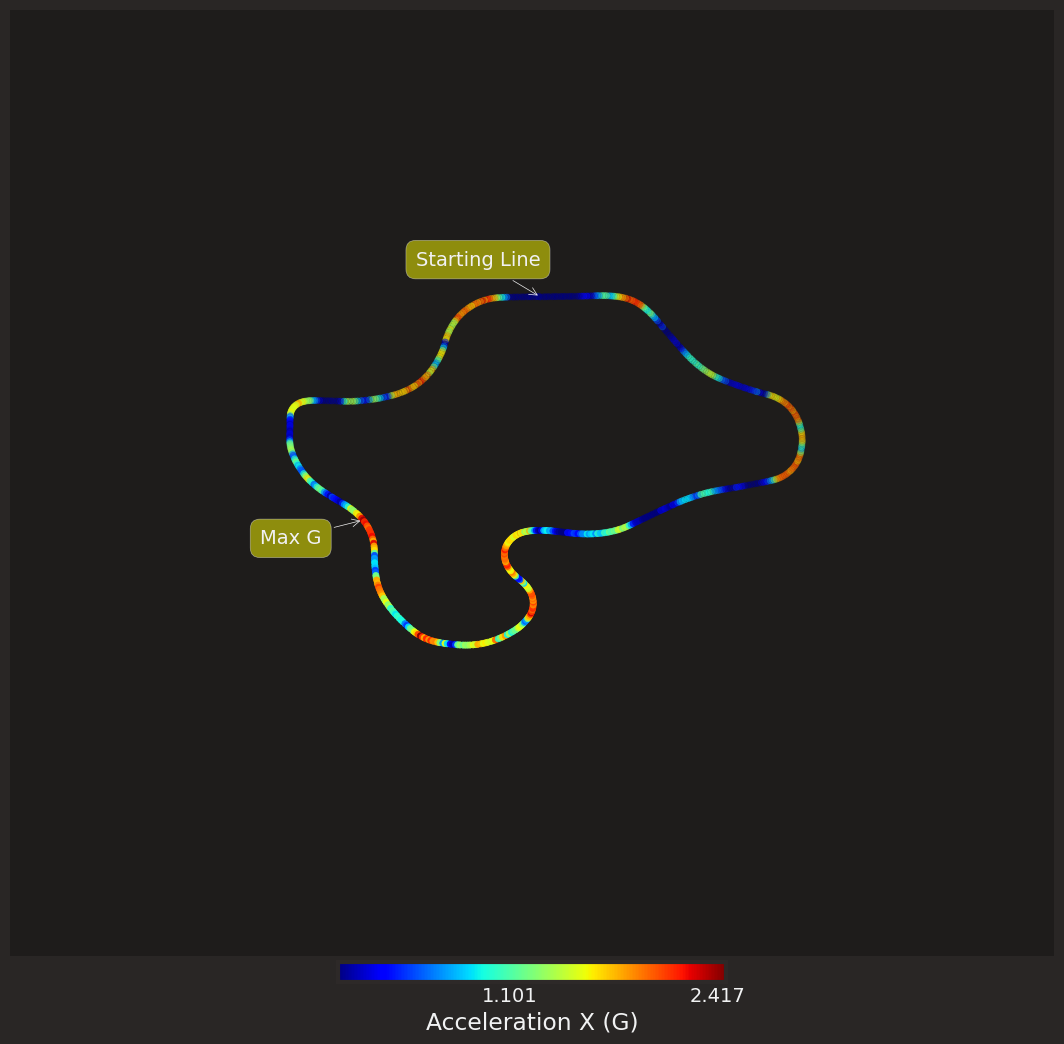

In [30]:
#%matplotlib notebook
import IPython.display as IPdisplay
import glob
from PIL import Image as PIL_Image
###fast-f1
from matplotlib import cycler
###
from matplotlib.animation import FuncAnimation
#tierra prospera circuit
from mpl_toolkits import mplot3d
import matplotlib as mpl
from mpl_toolkits.mplot3d import proj3d
import pylab
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
### from fast-f1
COLOR_PALETTE = ['#FF79C6', '#50FA7B', '#8BE9FD', '#BD93F9',
                 '#FFB86C', '#FF5555', '#F1FA8C']
plt.rcParams['figure.facecolor'] = '#292625'
plt.rcParams['axes.edgecolor'] = '#2d2928'
plt.rcParams['xtick.color'] = '#f1f2f3'
plt.rcParams['ytick.color'] = '#f1f2f3'
plt.rcParams['axes.labelcolor'] = '#F1f2f3'
plt.rcParams['axes.facecolor'] = '#1e1c1b'
# plt.rcParams['axes.facecolor'] = '#292625'
plt.rcParams['axes.titlesize'] = 'x-large'
# plt.rcParams['font.family'] = 'Gravity'
plt.rcParams['font.weight'] = 'medium'
plt.rcParams['text.color'] = '#F1F1F3'
plt.rcParams['axes.titlesize'] = '19'
plt.rcParams['axes.titlepad'] = '12'
plt.rcParams['axes.titleweight'] = 'light'
plt.rcParams['axes.prop_cycle'] = cycler('color', COLOR_PALETTE)
plt.rcParams['legend.fancybox'] = False
plt.rcParams['legend.facecolor'] = (0.1, 0.1, 0.1, 0.7)
plt.rcParams['legend.edgecolor'] = (0.1, 0.1, 0.1, 0.9)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['axes.axisbelow'] = True
#######
fig = plt.figure(figsize = (12,12))
norm = plt.Normalize(vmin=np.min(lap['TotalAcceleration']), vmax=np.max(lap['TotalAcceleration']))
#norm = plt.Normalize(vmin=0, vmax=np.max(abs(lap['AccelerationX'] / 9.81)))
ax = plt.axes(projection='3d')
#ax.set_aspect('equal') #does not work for 3d
#ax.set_box_aspect(aspect = (1,1,1))
ax.set_axis_off() #turn off the background and grid and indecies
#cb1=mpl.colorbar.ColorbarBase(ax,cmap=cmap,norm=norm,orientation='horizontal')
#second lap is probably a little less odd than the first
#lap = race_amg_one.loc[(amg_one['Lap'] == 2)]
cmap = plt.cm.jet
#norm = plt.Normalize(vmin=np.min(abs(lap['TotalAcceleration'])), vmax=np.max(abs(lap['TotalAcceleration'])))
#ax.scatter(lap['PositionX'], lap['PositionY'], lap['PositionZ'],color=cmap(norm(abs(lap['TotalAcceleration']))))
ax.scatter(lap['PositionX'], lap['PositionY'], lap['PositionZ'],color=cmap(norm(abs(lap['AccelerationX'] / 9.81))))
#cb1 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, orientation='horizontal')
print (lap['AccelerationX'].min())
print (lap['AccelerationX'].max())
print (lap['AccelerationX'].mean())
#https://stackoverflow.com/questions/8130823/set-matplotlib-3d-plot-aspect-ratio
def set_aspect_equal(ax):
    """ 
    Fix the 3D graph to have similar scale on all the axes.
    Call this after you do all the plot3D, but before show
    """
    X = ax.get_xlim3d()
    Y = ax.get_ylim3d()
    Z = ax.get_zlim3d()
    a = [X[1]-X[0],Y[1]-Y[0],Z[1]-Z[0]]
    b = np.amax(a)
    ax.set_xlim3d(X[0]-(b-a[0])/2,X[1]+(b-a[0])/2)
    ax.set_ylim3d(Y[0]-(b-a[1])/2,Y[1]+(b-a[1])/2)
    ax.set_zlim3d(Z[0]-(b-a[2])/2,Z[1]+(b-a[2])/2)
    #ax.set_box_aspect(aspect = (1,1,1))

set_aspect_equal(ax)
ax.view_init(0, -90)
#azimuth -90
#elevation 0fig,ax=plt.subplots(figsize=(6,1))

#lap['TotalAcceleration'] = np.where(DF_test['value'] > threshold, 1,0)

def update(i, fig, ax):
    #ax.view_init(elev=0, azim=i)
    ax.view_init(elev=0, azim=i) #not really possible to do the cool animation I was looking for
    #at least not with this method
    return fig, ax
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

## annotating Max G location because ?? how.
maxg = lap.loc[(lap['AccelerationX'] == lap['AccelerationX'].max())]
maxg_x = maxg['PositionX']
maxg_y = maxg['PositionY']
maxg_z = maxg['PositionZ']
x2, y2, _ = proj3d.proj_transform(maxg_x,maxg_y,maxg_z, ax.get_proj())

label = pylab.annotate(
    "Max G", 
    xy = (x2, y2), xytext = (-30, -20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0', facecolor='white'))
##

## annotating starting line
startingline = lap.loc[(lap['CurrentLapTime'] == lap['CurrentLapTime'].max())]
starting_x = startingline['PositionX']
starting_y = startingline['PositionY']
starting_z = startingline['PositionZ']
x3, y3, _ = proj3d.proj_transform(starting_x,starting_y,starting_z, ax.get_proj())
starting_label = pylab.annotate(
    "Starting Line", 
    xy = (x3, y3), xytext = (0, 20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0', facecolor='red'))

plt.colorbar(sm, ticks=[np.min(abs(lap['AccelerationX']) / 9.81),np.mean(abs(lap['AccelerationX']) / 9.81),np.max(lap['AccelerationX'] / 9.81)],label="Acceleration X (G)",orientation="horizontal",fraction=0.02, pad=0.006)

#anim = FuncAnimation(fig, update, frames=np.arange(0, 270, 2), repeat=False, fargs=(fig, ax))
#anim.save('/home/mark/tierra-prospera-colorbar-animation-cute.gif', dpi=80, writer='imagemagick', fps=24)
plt.show()

That looks better. Let's see what it looks like in the game. 